<a href="https://colab.research.google.com/github/VietHoangg03/AppMobile_BN/blob/main/Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kỹ thuật Mean dùng để làm mờ hình ảnh.

In [ ]:
def calculate_mean(numbers):
    s = sum(numbers)
    N = len(numbers)
    mean = s/N
    return mean

(326, 435)


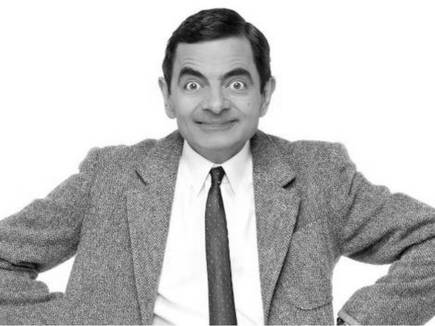

In [6]:
# load image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # ✅ thêm dòng này

image = cv2.imread('mrbean.jpg', 0)  # 0: load ảnh grayscale
row_col = image.shape
print(row_col)

cv2_imshow(image)  # ✅ thay thế imshow bằng cv2_imshow
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
kernel = np.ones((5,5), np.float32) / 25.0
print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


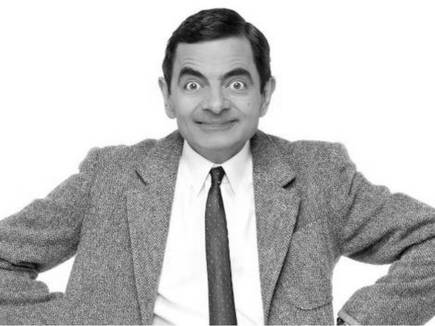

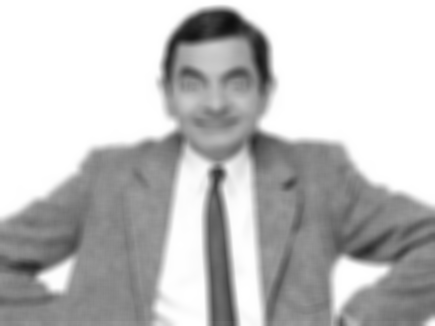

In [8]:
# load image and blurring
# Ứng dụng mean giá trị trung bình trong việc làm mờ ảnh
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # ✅ cần thêm dòng này

# load image in grayscale mode
image = cv2.imread('mrbean.jpg', 0)

# create kernel
kernel = np.ones((9,9), np.float32) / 81.0

# compute mean for each pixel
dst = cv2.filter2D(image, cv2.CV_8U, kernel)

# show images
cv2_imshow(image)        # ✅ thay thế imshow
cv2_imshow(dst)

# waiting for any keys pressed and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
# numpy review
import numpy as np

arr = np.ones((5,5))
print(arr)

roi = arr[1:4, 1:4]
print(roi)

# change
roi = roi + 1

arr[1:4, 1:4] = roi
print(arr)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1. 1. 1.]
 [1. 2. 2. 2. 1.]
 [1. 2. 2. 2. 1.]
 [1. 2. 2. 2. 1.]
 [1. 1. 1. 1. 1.]]


Blurred ROI:


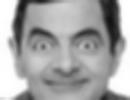

Final Image with Blurred ROI:


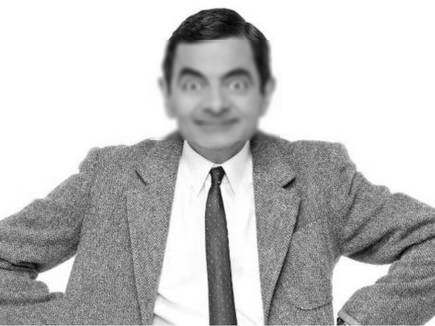

In [10]:
# load image and blurring using mask-simple

import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # ✅ thêm dòng này

# load image in grayscale mode
image = cv2.imread('mrbean.jpg', 0)

# create kernel
kernel = np.ones((5,5), np.float32) / 25.0

# Select ROI (top_y:bottom_y, left_x:right_x)
roi = image[40:140, 150:280]

# apply mean filter on ROI
blurred_roi = cv2.filter2D(roi, cv2.CV_8U, kernel)

# replace ROI in the original image
image[40:140, 150:280] = blurred_roi

# show results
print("Blurred ROI:")
cv2_imshow(blurred_roi)

print("Final Image with Blurred ROI:")
cv2_imshow(image)


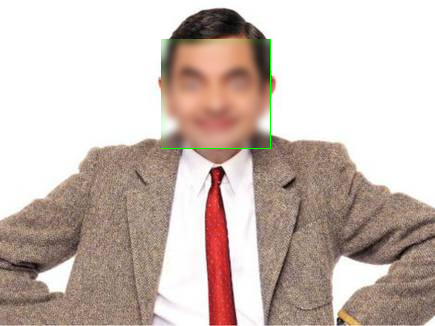

In [11]:
# load image and blurring using face detection

import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # ✅ Thêm dòng này

# Load face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')  # ✅ Đảm bảo đúng path

# load image in color mode
image = cv2.imread('mrbean.jpg', 1)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# create mean filter kernel
kernel = np.ones((7,7), np.float32) / 49.0

# apply filter to each detected face
for (x, y, w, h) in faces:
    # draw green rectangle (optional, for visualization)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)

    # extract region of interest (ROI)
    roi = image[y:y+h, x:x+w]

    # apply mean filter 3 times for stronger blur
    for _ in range(3):
        roi = cv2.filter2D(roi, cv2.CV_8U, kernel)

    # update blurred region back to image
    image[y:y+h, x:x+w] = roi

# show result
cv2_imshow(image)  # ✅ thay thế imshow


In [ ]:
import cv2
import numpy as np

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# To capture video from webcam.
cap = cv2.VideoCapture(0)

while True:
    # Read the frame
    _, img = cap.read()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)

    # Display
    cv2.imshow('img', img)

    # Stop if escape key is pressed
    key = cv2.waitKey(30) & 0xff
    if key==27:
        break

# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# To capture video from webcam.
cap = cv2.VideoCapture(0)

# create kernel
kernel = np.ones((7,7), np.float32) / 49.0

while True:
    # Read the frame
    _, img = cap.read()
    img2 = img.copy()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        # Select ROI (top_y,top_x,height, width)
        roi = img[y-10:y+h+10,x-10:x+w+10]

        # compute mean for each pixel
        roi = cv2.filter2D(roi, cv2.CV_8U, kernel)
        roi = cv2.filter2D(roi, cv2.CV_8U, kernel)
        roi = cv2.filter2D(roi, cv2.CV_8U, kernel)

        # update
        img[y-10:y+h+10,x-10:x+w+10] = roi

    # Display
    cv2.imshow('img', img)
    cv2.imshow('img2', img2)

    # Stop if escape key is pressed
    key = cv2.waitKey(30) & 0xff
    if key==27:
        break

# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# To capture video from webcam.
cap = cv2.VideoCapture(0)

# create kernel
kernel = np.ones((9,9), np.float32) / 81.0
pad = 1

while True:
    # Read the frame
    _, img = cap.read()
    img2 = img.copy()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        # Select ROI (top_y,top_x,height, width)
        roi = img[y-pad:y+h+pad,x-pad:x+w+pad]  # boundary

        # compute mean for each pixel
        roi = cv2.filter2D(roi, cv2.CV_8U, kernel)
        roi = cv2.filter2D(roi, cv2.CV_8U, kernel)
        roi = cv2.filter2D(roi, cv2.CV_8U, kernel)

        # update
        img[y-pad:y+h+pad,x-pad:x+w+pad] = roi  # boundary

    # Display
    cv2.imshow('img', img)
    cv2.imshow('img2', img2)

    # Stop if escape key is pressed
    key = cv2.waitKey(30) & 0xff
    if key==27:
        break

# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# To capture video from webcam.
cap = cv2.VideoCapture(0)

# select region
while True:
    # Read the frame and Convert to grayscale
    _, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    top_left = (200,300)
    bottom_right = (400,400)
    cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)


    # Display
    cv2.imshow('img', img)

    # Stop if escape key is pressed
    if cv2.waitKey(33) == ord('a'):
        break

template = gray[300:400, 200:400]
w, h = template.shape[::-1]
cv2.imshow('template', template)
cv2.waitKey(0)

while True:
    # Read the frame and Convert to grayscale
    _, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    corr_map = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(corr_map)

    # take minimum
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # draw
    cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)


    # Display
    cv2.imshow('img', img)

    # Stop if escape key is pressed
    if cv2.waitKey(33) == ord('a'):
        break

# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()

MEDIAN

In [12]:
import numpy as np
import cv2

# Đọc ảnh
image = cv2.imread('mrbean.jpg')

# Lấy kích thước ảnh
row, col, ch = image.shape

# Tham số nhiễu
s_vs_p = 0.5       # tỉ lệ salt:pepper
amount = 0.009     # tỷ lệ pixel bị nhiễu

# Tạo bản sao ảnh
out = np.copy(image)

# ===== Thêm nhiễu "salt" =====
num_salt = np.ceil(amount * image.size * s_vs_p).astype(int)
coords = [np.random.randint(0, i, num_salt) for i in image.shape[:2]]
out[coords[0], coords[1]] = [255, 255, 255]  # pixel trắng

# ===== Thêm nhiễu "pepper" =====
num_pepper = np.ceil(amount * image.size * (1. - s_vs_p)).astype(int)
coords = [np.random.randint(0, i, num_pepper) for i in image.shape[:2]]
out[coords[0], coords[1]] = [0, 0, 0]        # pixel đen

# Lưu ảnh kết quả
cv2.imwrite('mrbean_noise.jpg', out)


True

Ảnh bị nhiễu:


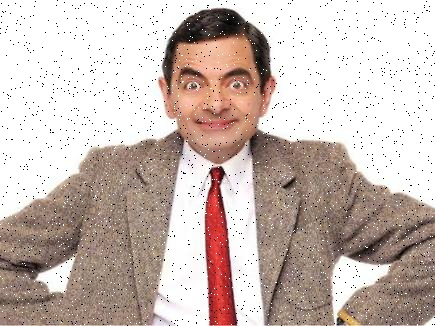

Ảnh sau khi lọc median:


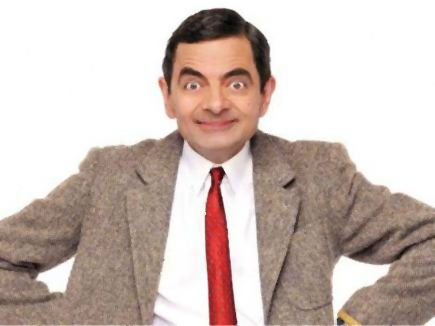

In [14]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img1 = cv2.imread('mrbean_noise.jpg')
img2 = cv2.medianBlur(img1, 3)

# Hiển thị ảnh
print("Ảnh bị nhiễu:")
cv2_imshow(img1)

print("Ảnh sau khi lọc median:")
cv2_imshow(img2)
